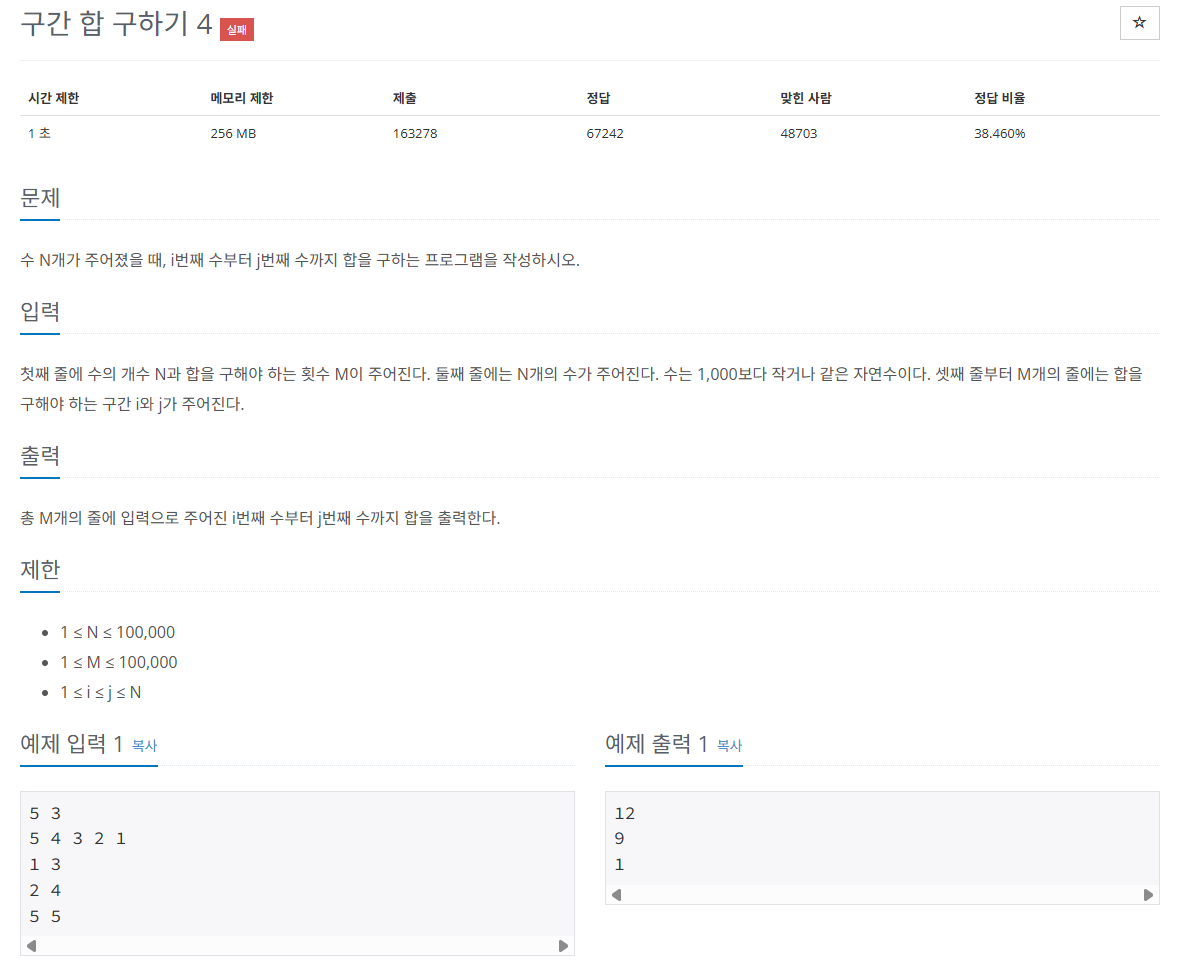

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-16 012514.png")
img

In [7]:
import sys

input = sys.stdin.readline

N,M=map(int,input().split())
numlist=list(map(int,input().split()))

Sum_list=[0]*100001
for i in range(len(numlist)):
    Sum_list[i]=numlist[i]+Sum_list[i-1]

for _ in range(M):
    i,j=map(int,input().split())
    Ans=Sum_list[j-1]-Sum_list[i-2]
    print(Ans)

12
9
1


네, '제출완료' 확인했습니다. 시간 초과를 해결하기 위해 '누적 합(Prefix Sum)'이라는 핵심 아이디어를 정확하게 코드로 옮기셨습니다. 정말 훌륭합니다\!

정답에 거의 다다랐지만, 현재 코드에는 리스트의 \*\*인덱스(index)\*\*를 다루는 부분에 아주 사소하지만 치명적인 오류가 숨어있습니다. 이 부분만 해결하면 완벽한 코드가 될 겁니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.5 / 5.0 점**

      * **평가:** **핵심 로직이 완벽한, 매우 훌륭한 코드입니다.** 누적 합의 원리를 정확히 이해하고 O(N+M)이라는 최적의 시간 복잡도를 달성했습니다. 다만, `i=1`일 때 `Sum_list[i-2]`가 음수 인덱스에 접근하여 의도와 다르게 동작하거나 에러를 유발할 수 있는 작은 함정이 있습니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 훌륭한 로직을 그대로 유지하면서, 누적 합을 만들고 사용하는 표준적인 인덱싱 방식을 적용하여 코드의 안정성과 가독성을 높인 버전입니다.

-----

### \#\# Gemini 추천 코드 (표준 누적 합 방식)

이 방식은 누적 합 배열을 원래 배열보다 한 칸 더 크게 만들고, 맨 앞에 `0`을 추가하여 인덱싱을 훨씬 더 간단하고 안전하게 만듭니다.

```python
import sys

input = sys.stdin.readline

N, M = map(int, input().split())
numbers = list(map(int, input().split()))

# 1. 누적 합 배열을 N+1 크기로 만들고, 0으로 초기화
prefix_sum = [0] * (N + 1)

# 2. 누적 합 배열을 계산
# prefix_sum[i]는 numbers의 첫 i개 요소의 합을 의미
for i in range(N):
    prefix_sum[i+1] = prefix_sum[i] + numbers[i]

# 3. M개의 쿼리 처리
for _ in range(M):
    i, j = map(int, input().split())
    # i번째부터 j번째까지의 합은 (1~j까지의 합) - (1~i-1까지의 합)
    # 우리 배열에서는 prefix_sum[j] - prefix_sum[i-1]
    result = prefix_sum[j] - prefix_sum[i-1]
    print(result)
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 알고리즘을 사용했습니다.** 누적 합 배열을 만드는 데 O(N), M개의 구간 합을 구하는 데 O(M)이 걸리므로, 전체 시간 복잡도는 \*\*O(N+M)\*\*입니다. 알고리즘 자체는 더 이상 개선할 부분이 없습니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

  * **내 풀이:** `Sum_list=[0]*100001` 처럼 배열 크기를 고정하는 대신, `[0] * (N + 1)`처럼 입력 `N`에 따라 동적으로 할당하는 것이 더 일반적이고 메모리 효율적입니다.
  * **배울 점:** 추천 코드처럼, 누적 합 배열의 인덱스와 원래 배열의 인덱스를 명확하게 분리(예: `prefix_sum[i+1] = ... + numbers[i]`)하면 코드를 이해하고 디버깅하기가 더 쉬워집니다.

-----

### \#\# 3. 또 다른 측면: 인덱싱의 함정과 안정성

이번 코드에서 논의할 수 있는 가장 중요한 부분은 바로 \*\*'인덱싱'\*\*입니다.

  * **사용자님의 코드:** `Ans = Sum_list[j-1] - Sum_list[i-2]`

  * **핵심 문제점:** 만약 입력으로 `i=1`이 들어오면 어떻게 될까요? 코드는 `Sum_list[-1]`에 접근하게 됩니다. 파이썬에서 음수 인덱스는 리스트의 맨 뒤를 가리키므로, 의도치 않은 값(이 경우 0)을 빼게 되어 **틀린 답**을 내놓게 됩니다. (만약 `Sum_list`를 `N` 크기로 만들었다면 `IndexError`가 발생했을 수도 있습니다.)

  * **추천 코드의 해결책:**

      * `prefix_sum` 배열을 `N+1` 크기로 만들고, `prefix_sum[0]`을 `0`으로 비워둡니다.
      * 이렇게 하면 `prefix_sum[k]`는 "원래 배열의 첫 번째부터 k번째까지의 합"이라는 의미를 갖게 됩니다.
      * 이제 `i`부터 `j`까지의 합을 구하는 공식은 항상 \*\*`prefix_sum[j] - prefix_sum[i-1]`\*\*이 됩니다.
      * 만약 `i=1`이 들어와도, `prefix_sum[1-1]`, 즉 `prefix_sum[0]`에 접근하게 되는데, 이 값은 우리가 의도적으로 `0`으로 설정해두었기 때문에 완벽하게 동작합니다.

이처럼 누적 합 문제에서는 **배열을 한 칸 더 크게 만들고 0번 인덱스를 비워두는 것**이 `if i == 1:` 과 같은 예외 처리 코드를 없애고, 공식을 단순하게 만들어주는 매우 일반적이고 강력한 테크닉입니다.